# Computer Vision: la svolta del Deep Learning

Intorno al 2012, le Deep Convolutional Neural Networks hanno stracciato qualsiasi record esistente sui task di Computer Vision, ed è da qui che è nata l'era del Deep Learning.

Questa volta iniziamo con il dataset [`CIFAR-10`](https://www.cs.toronto.edu/~kriz/cifar.html)! MNIST siamo riusciti a "batterlo" con una rete neurale "standard", non sarebbe equo rifarlo anche con le reti convoluzionali.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as K
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Vediamo che cosa abbiamo sotto mano.

In [ ]:
print(x_train.shape, y_train.shape, np.min(y_train), np.max(y_train))
print(x_train.dtype, np.min(x_train), np.max(x_train))

print(x_test.shape, y_test.shape, np.min(x_test), np.max(y_test))

Ok, un bel dataset di 50000 immagini 32x32 con tre canali (RGB). I target invece sono classi che vanno da 0 a 9 (i.e. le solite 10 classi). 

Dato che tutti e tre i canali hanno, di nuovo, valori da 0 a 255, quindi dopo dovremo utilizzare di nuovo il nostro `Rescaling` layer.

(-0.5, 31.5, 31.5, -0.5)

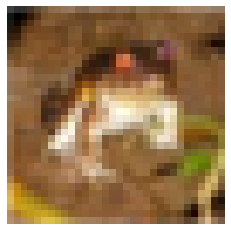

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.axis('off')

In [ ]:
print(x_train[0])

Beh, niente più numeri. Solo una bella rana pixellata a dovere.

## Convolutional Neural Networks

Le reti convoluzionali rappresentano il miglior candidato per task di predizione su immagini.

Un blocco convoluzionale si basa su tre componenti principali:

1. Un filtro convoluzionale bidimensionale;
2. [Opzionale] Un layer di `batch normalization`
3. Un layer di pooling.

Vediamo che cosa fanno.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization

In [7]:
inputs = K.Input(shape=(32, 32, 3))
x1 = K.layers.Rescaling(1./255)(inputs)

x2 = K.layers.Conv2D(32, 3, strides=2, padding="same")(x1)
x3 = K.layers.Activation("relu")(x2)

x4 = K.layers.Conv2D(64, 3, padding="same")(x3)
x5 = K.layers.Activation("relu")(x4)

x6 = K.layers.Conv2D(128, 3, padding="same")(x5)
x7 = K.layers.Activation("relu")(x6)
x = K.layers.MaxPool2D(3)(x7)

x = K.layers.Conv2D(256, 3, padding="same")(x)
x = K.layers.Activation("relu")(x)
x = K.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = K.layers.Flatten()(x) 

outputs = K.layers.Dense(10, activation="softmax")(x)

model = K.Model(inputs, outputs)

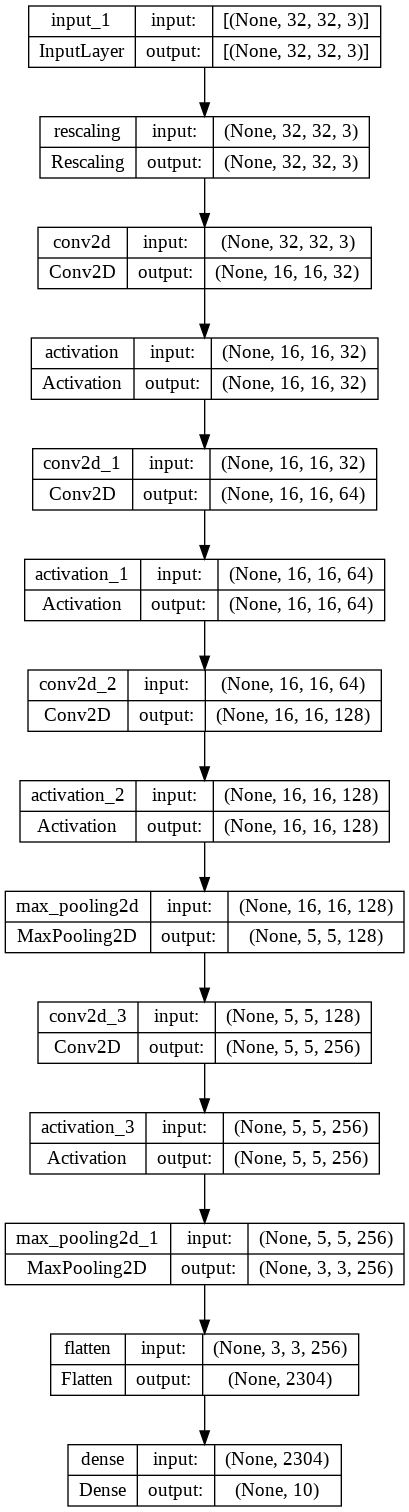

In [8]:
K.utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(
    optimizer=K.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_split=0.25)

In [ ]:
metrics = model.evaluate(x_test, y_test)
print(metrics)

In [21]:
inputs = K.Input(shape=(32, 32, 3))
x = K.layers.Rescaling(1./255)(inputs)

x = K.layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)

x = K.layers.Conv2D(64, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)

x = K.layers.Conv2D(128, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)
x = K.layers.MaxPool2D(3)(x)

x = K.layers.Conv2D(256, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)
x = K.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = K.layers.Flatten()(x) 

outputs = K.layers.Dense(10, activation="softmax")(x)

model = K.Model(inputs, outputs)

In [18]:
model.compile(
    optimizer=K.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(x_train, y_train, epochs=12, batch_size=1000, validation_split=0.25)

In [ ]:
metrics = model.evaluate(x_test, y_test)
print(metrics)

# Esercizio
Implementare una vostra rete per CIFAR-10 

In [33]:
"Esempio"

inputs = K.Input(shape=(32, 32, 3))
x = K.layers.Rescaling(1./255)(inputs)

x = K.layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)

x = K.layers.Conv2D(64, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)

x = K.layers.Conv2D(128, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)
x = K.layers.MaxPool2D(3)(x)

x = K.layers.Conv2D(256, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)
x = K.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = K.layers.Conv2D(512, 3, padding="same")(x)
x = K.layers.BatchNormalization()(x)
x = K.layers.Activation("relu")(x)
x = K.layers.MaxPooling2D(3, strides=2, padding="same")(x)

x = K.layers.Flatten()(x) 

outputs = K.layers.Dense(10, activation="softmax")(x)

model = K.Model(inputs, outputs)

In [35]:
model.compile(
    optimizer=K.optimizers.Adam(1e-3), # TODO: modificare valore learning_rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_split=0.25) # TODO: modificare epochs

In [ ]:
metrics = model.evaluate(x_test, y_test)
print(metrics)

# Your Turn!

Implementate una vostra rete convoluzionale e provatela su MNIST!

In [ ]:
#TODO